In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
credit_card = pd.read_csv('D:\seda\SEDA Experiment\creditcard.csv')
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card.info()
print("Jumlah baris & kolom:", credit_card.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit_card.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
missing_values = credit_card.isnull().sum()
print("Missing values in each column:")
print(missing_values)

credit_card.dropna(inplace=True)

def preprocess_text(text):

      words = word_tokeize(text.lower())
        
      words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]
      return' '.join(words)

Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
credit_card.drop_duplicates(inplace=True)


In [10]:
print("Nilai minimum Amount:", credit_card['Amount'].min())
print("Nilai minimum Time:", credit_card['Time'].min())

Nilai minimum Amount: 0.0
Nilai minimum Time: 0.0


Top jam dengan jumlah fraud terbanyak:
Hour
11    53
2     48
17    28
dtype: int64


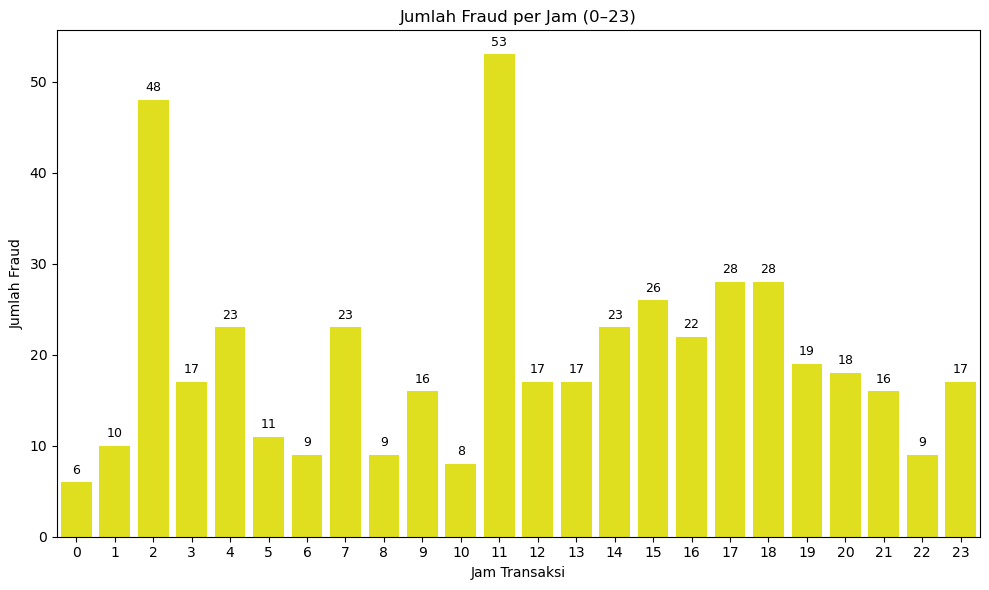

In [16]:
credit_card['Hour'] = (credit_card['Time'] // 3600) % 24

fraud_by_hour = (
    credit_card[credit_card['Class'] == 1]
    .groupby('Hour')
    .size()
    .reindex(range(24), fill_value=0)    
)

print("Top jam dengan jumlah fraud terbanyak:")
print(fraud_by_hour.sort_values(ascending=False).head(3))

plt.figure(figsize=(10,6))
ax = sns.barplot(x=fraud_by_hour.index, y=fraud_by_hour.values, color='yellow')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', xytext=(0,4), textcoords='offset points', fontsize=9)

plt.title("Jumlah Fraud per Jam (0–23)")
plt.xlabel("Jam Transaksi")
plt.ylabel("Jumlah Fraud")
plt.tight_layout()
plt.show()

proportion of each class Class
0    283253
1       473
Name: count, dtype: int64
Percentage Class
0    99.83329
1     0.16671
Name: count, dtype: float64


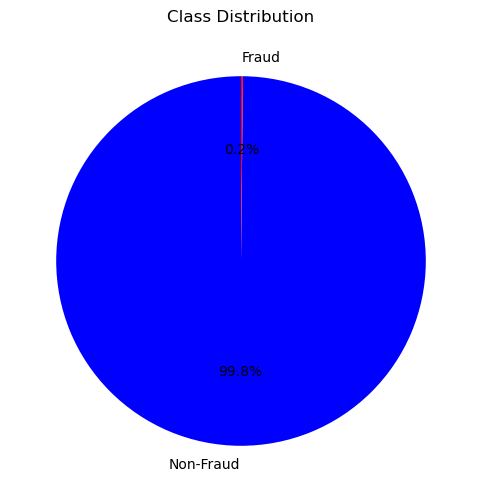

In [25]:
counts = credit_card['Class'].value_counts()
print("proportion of each class", counts)
print("Percentage", counts / len(credit_card) * 100)

plt.figure(figsize=(6,6))
plt.pie(counts.values, labels=['Non-Fraud', 'Fraud'], 
        autopct='%1.1f%%', colors=['blue','red'], startangle=90)
plt.title("Class Distribution")
plt.show()

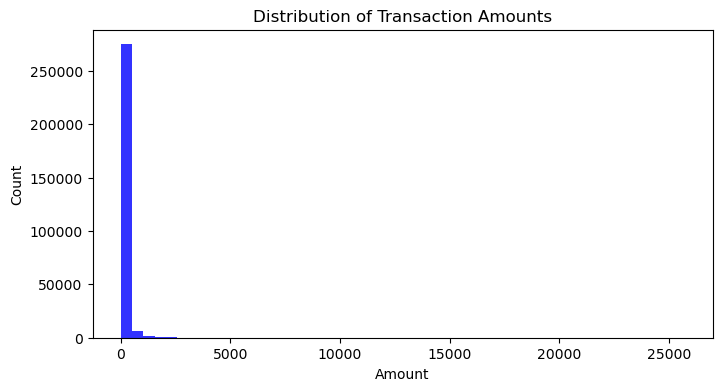

In [26]:
plt.figure(figsize=(8,4))
plt.hist(credit_card['Amount'], bins=50, color='blue', alpha=0.8)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()

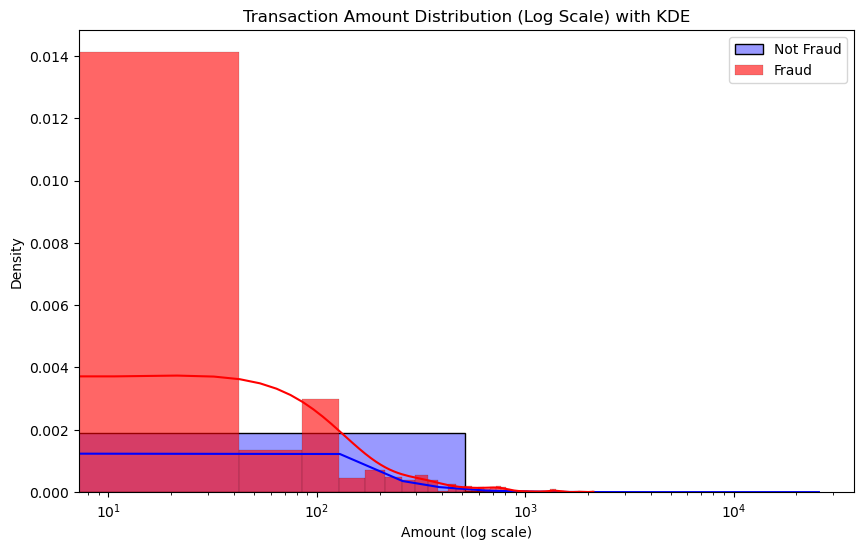

In [29]:
fraud = credit_card[credit_card['Class']==1]['Amount']
not_fraud = credit_card[credit_card['Class']==0]['Amount']

plt.figure(figsize=(10,6))

sns.histplot(not_fraud, bins=50, color='blue', alpha=0.4, label='Not Fraud', kde=True, stat="density")
sns.histplot(fraud, bins=50, color='red', alpha=0.6, label='Fraud', kde=True, stat="density")

plt.xscale('log')
plt.title("Transaction Amount Distribution (Log Scale) with KDE")
plt.xlabel("Amount (log scale)")
plt.ylabel("Density")
plt.legend()
plt.show()

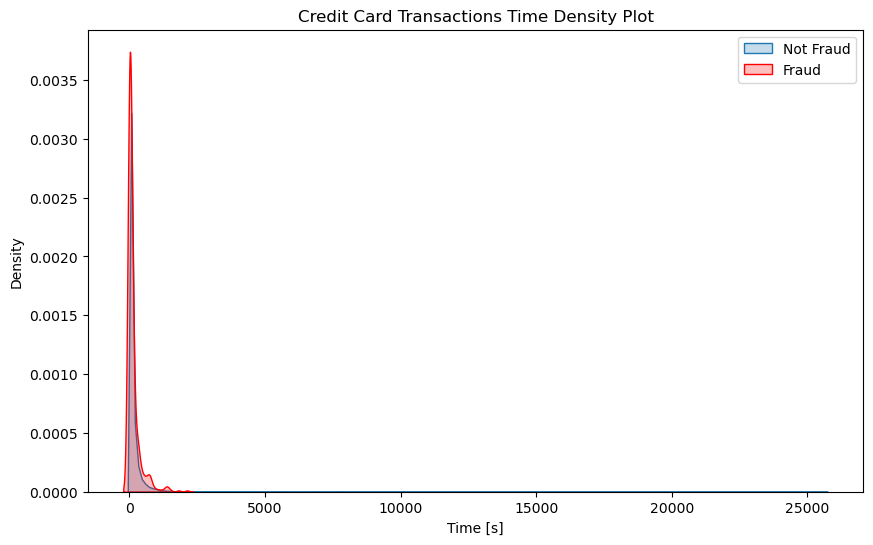

In [30]:
plt.figure(figsize=(10,6))
sns.kdeplot(not_fraud, label='Not Fraud', shade=True)
sns.kdeplot(fraud, label='Fraud', shade=True, color='red')
plt.title('Credit Card Transactions Time Density Plot')
plt.xlabel('Time [s]')
plt.ylabel('Density')
plt.legend()
plt.show()

In [46]:

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB

credit_card = ["apple", "banana", "grape", "orange", "strawberry"]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(credit_card)
y = ["fruit"] *  len(credit_card) 

autocomplete_model = MultinomialNB()

autocomplete_model.fit(X, y)

MultinomialNB()

In [52]:
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

credit_card = ["apple", "banana", "grape", "orange", "strawberry"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(credit_card)
y = ["fruit"] * len(credit_card)

autocomplete_model = MultinomialNB()
autocomplete_model.fit(X, y)

def benchmark_function(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    execution_time = end_time - start_time
    return result, execution_time

prefix = "a" 

def predict(prefix):

    return [word for word in credit_card if word.startswith(prefix)]

autocomplete_result, autocomplete_time = benchmark_function(predict, prefix)
print (f"Autocomplete Result: {autocomplete_result}")
print(f"Autocomplete Time: {autocomplete_time:.4f}seconds")   

Autocomplete Result: ['apple']
Autocomplete Time: 0.0000seconds


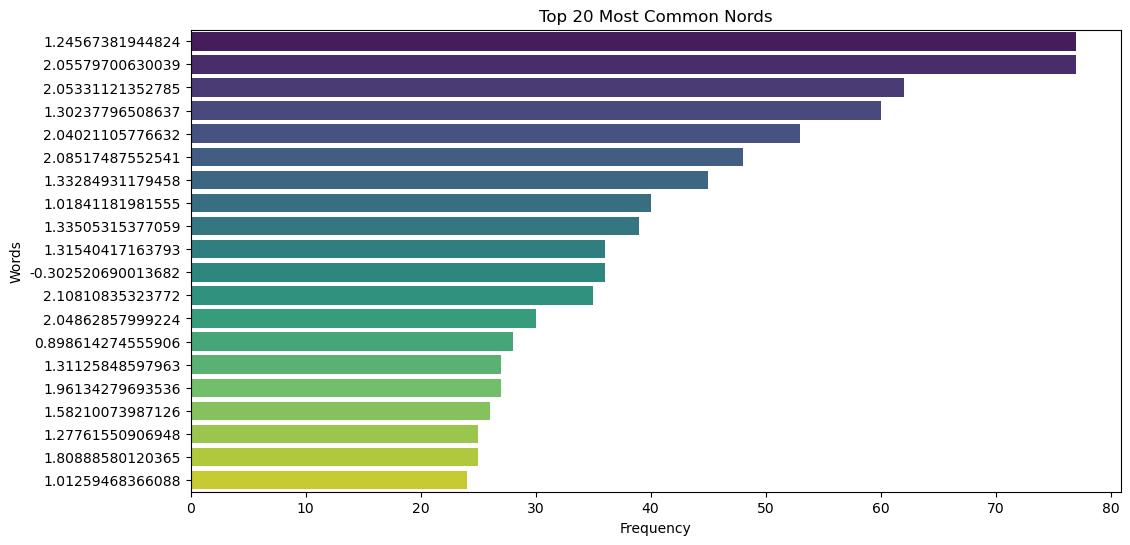

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

credit_card = pd.read_csv('D:\seda\SEDA Experiment\creditcard.csv') 

word_list = ' '.join(credit_card['V1'].dropna().astype(str).tolist()).split()
word_freq = Counter(word_list)

common_words = word_freq.most_common(20)
words, frequencies = zip(*common_words)

plt.figure(figsize = (12, 6))
sns.barplot(x=list(frequencies), y=list(words), hue = list (words), palette = 'viridis')
plt.title('Top 20 Most Common Nords')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()                      

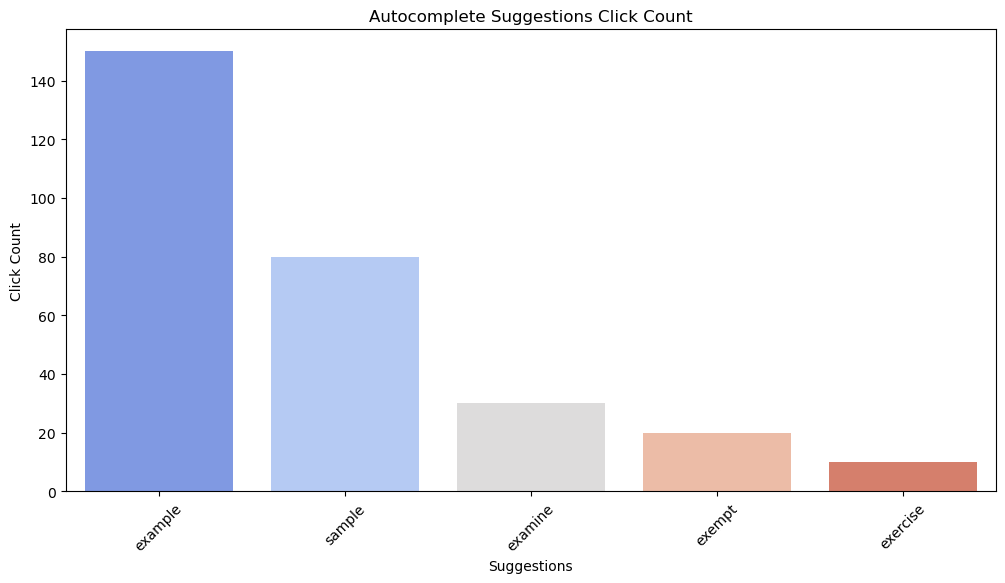

In [2]:
suggestions = ['example', 'sample', 'examine', 'exempt', 'exercise']
suggestion_counts = [150, 80, 30, 20, 10]

plt.figure(figsize=(12, 6))
sns.barplot(x=suggestions, y=suggestion_counts, hue=suggestions, palette='coolwarm')
plt.title('Autocomplete Suggestions Click Count')
plt.xlabel('Suggestions')
plt.ylabel('Click Count')
plt.xticks(rotation=45)
plt.show() 

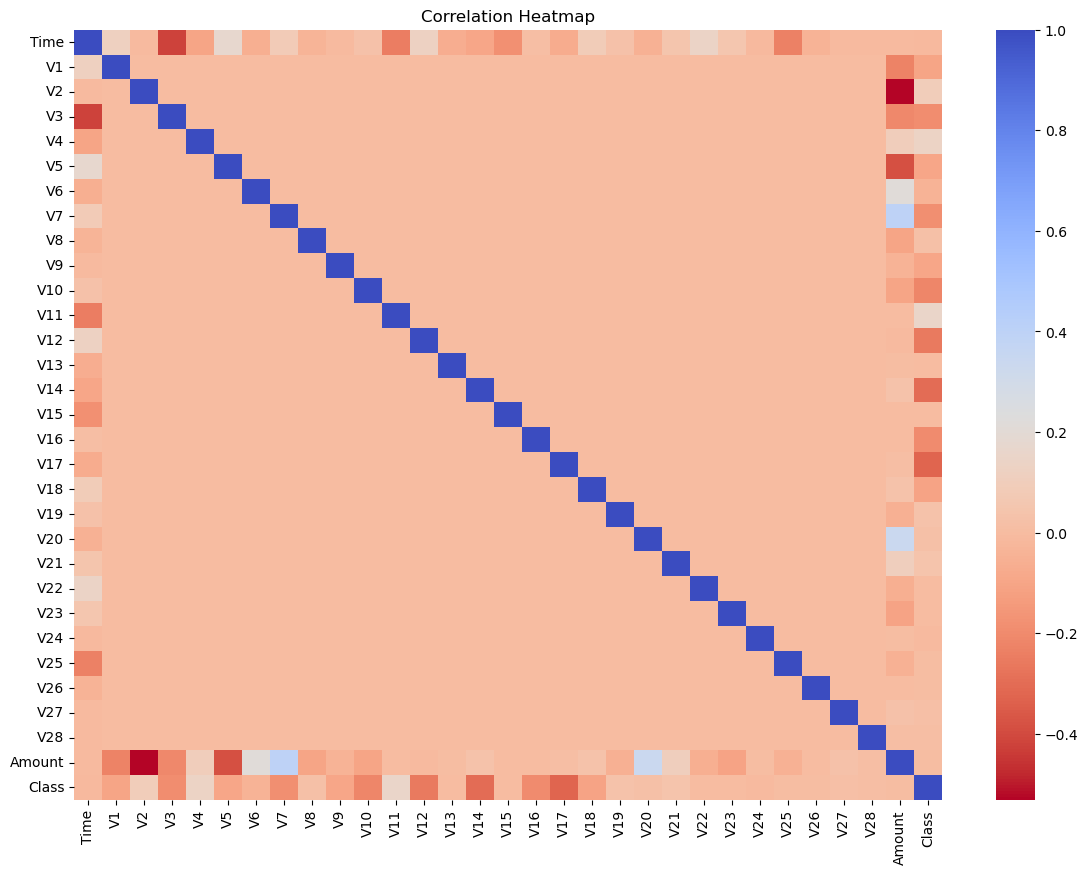

In [4]:
plt.figure(figsize=(14, 10))
corr = credit_card.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Bansi\AppData\Local\Temp\ipykernel_2688\2604984673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


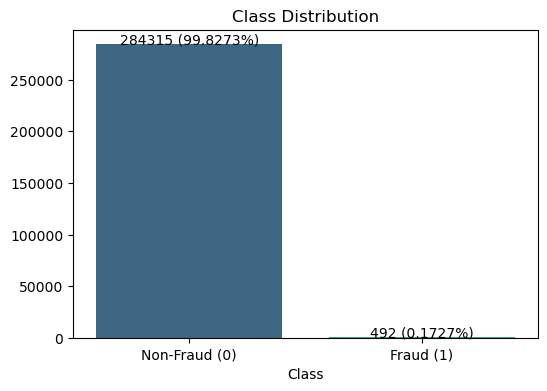

In [5]:
plt.figure(figsize=(6, 4))
class_counts =credit_card ['Class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 200, f'{v} ({v/credit_card.shape[0]*100:.4f}%)', ha='center')
plt.show()

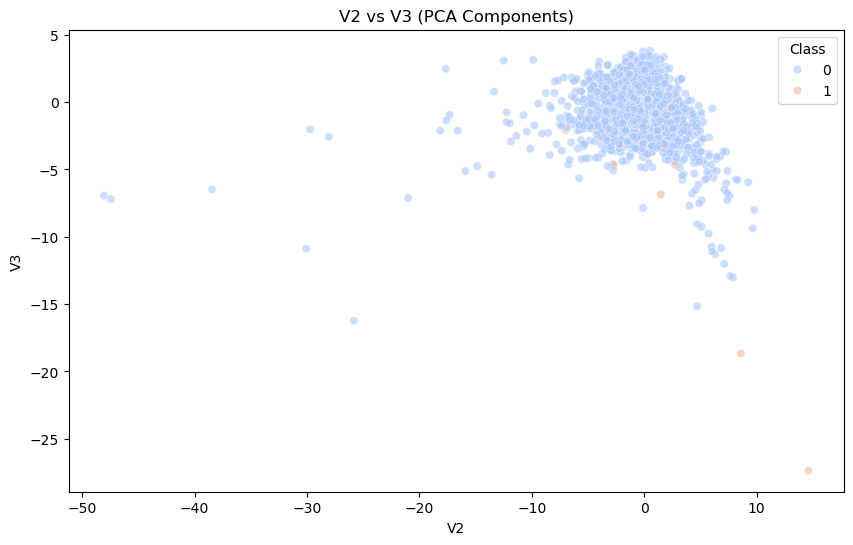

In [6]:
import random
sampled_df = credit_card.sample(10000, random_state=42)  # Use sample for performance

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_df, x='V2', y='V3', hue='Class', palette='coolwarm', alpha=0.6)
plt.title('V2 vs V3 (PCA Components)')
plt.show()

In [9]:
credit_card['Hour'] = (credit_card['Time'] // 3600) % 24
credit_card.drop('Time', axis=1, inplace=True)

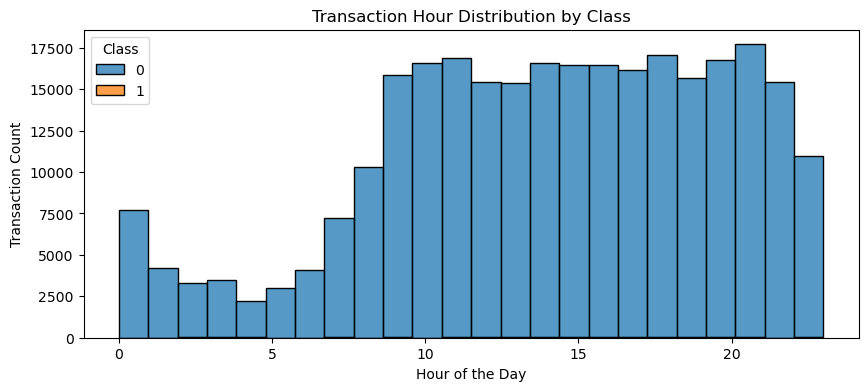

In [10]:
plt.figure(figsize=(10, 4))
sns.histplot(data=credit_card, x='Hour', hue='Class', bins=24, multiple='stack')
plt.title('Transaction Hour Distribution by Class')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.show()

C:\Users\Bansi\AppData\Local\Temp\ipykernel_2688\2135422655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='V14', data=credit_card, palette='Set2')


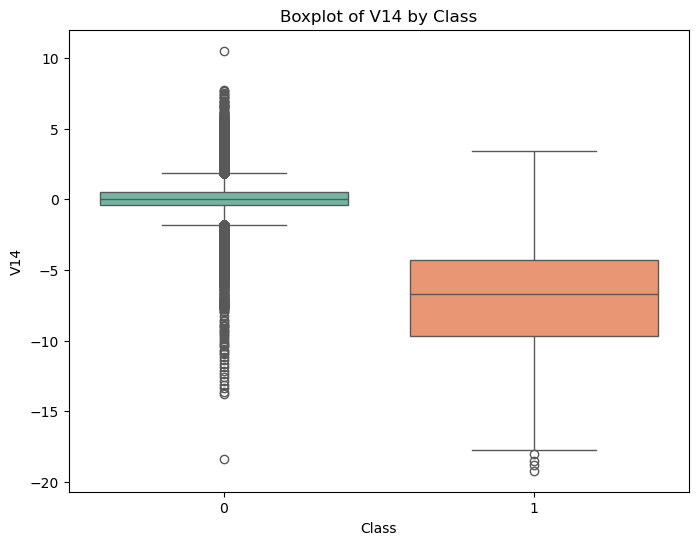

C:\Users\Bansi\AppData\Local\Temp\ipykernel_2688\2135422655.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='V17', data=credit_card, palette='Set3')


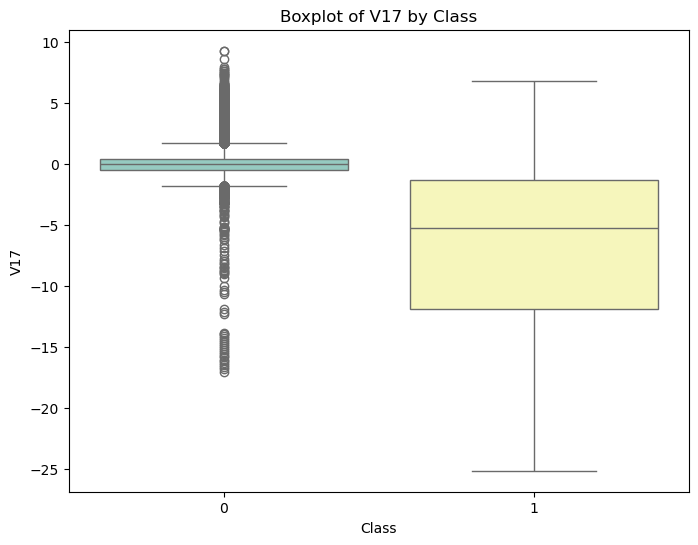

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='V14', data=credit_card, palette='Set2')
plt.title("Boxplot of V14 by Class")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='V17', data=credit_card, palette='Set3')
plt.title("Boxplot of V17 by Class")
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
credit_card['Amount'] = scaler.fit_transform(credit_card[['Amount']])

X = credit_card.drop('Class', axis=1)
y = credit_card['Class']

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

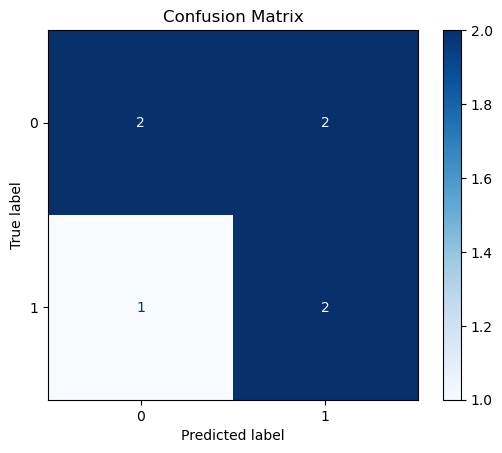

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = [0, 1, 0, 1, 0, 1, 0]
y_pred = [0, 1, 1, 1, 0, 0, 1] 

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

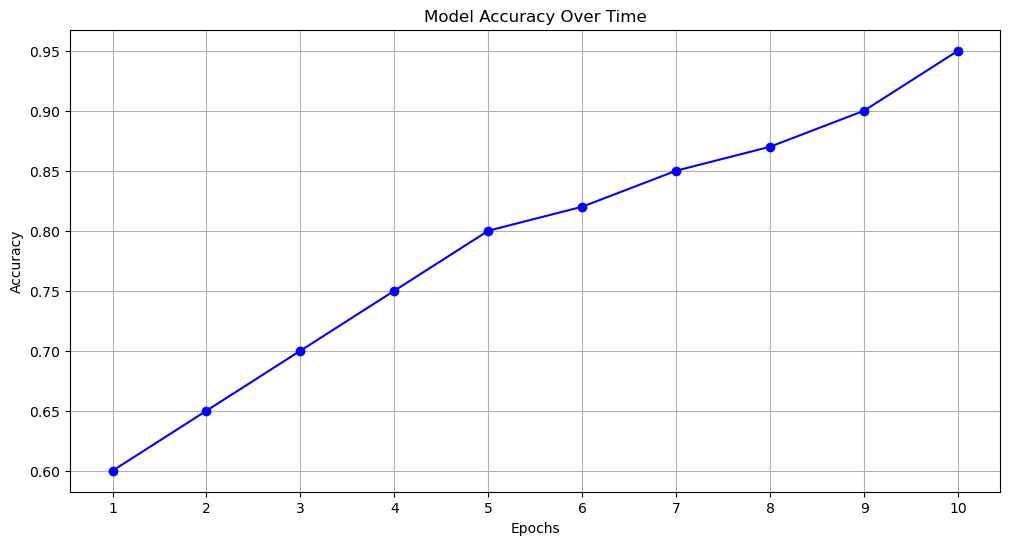

In [8]:
epochs = list(range(1,11))
accuracy = [0.6,0.65,0.7,0.75,0.8,0.82,0.85,0.87,0.9,0.95]

plt.figure(figsize=(12,6))
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy Over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.grid()
plt.show()

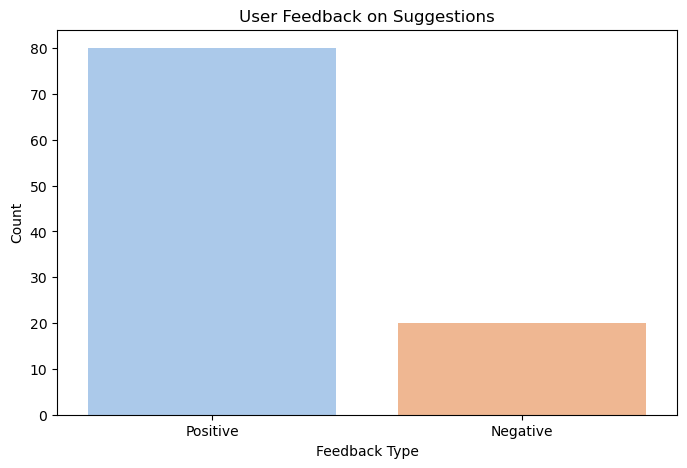

In [10]:
import seaborn as sns

feedback_labels = ['Positive','Negative']
feedback_counts = [80,20]

plt.figure(figsize=(8,5))
sns.barplot(x=feedback_labels, y=feedback_counts,hue=feedback_labels, palette='pastel')
plt.title('User Feedback on Suggestions')
plt.xlabel('Feedback Type')
plt.ylabel('Count')
plt.show()

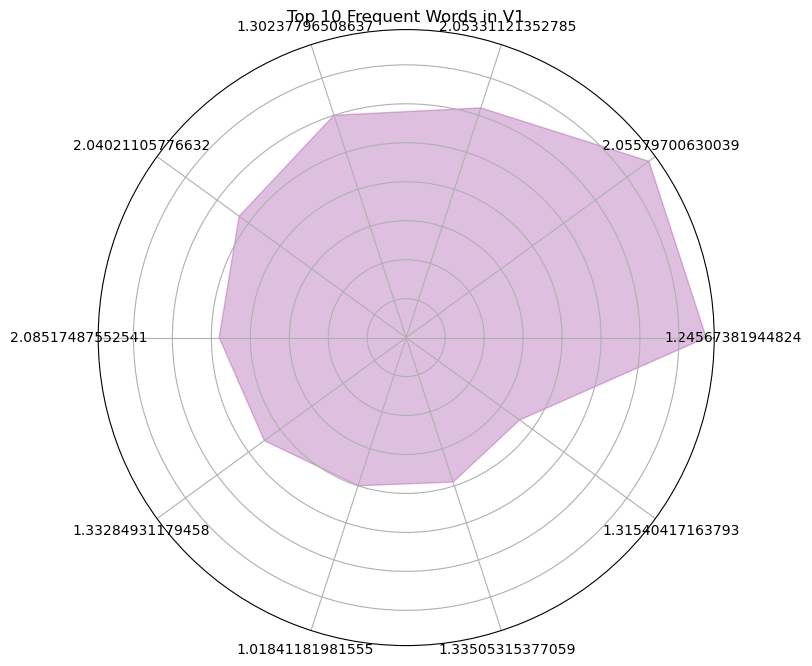

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load dataset
credit_card = pd.read_csv(r'D:\seda\SEDA Experiment\creditcard.csv')

# Preprocess
credit_card['V1'] = credit_card['V1'].astype(str)
credit_card = credit_card.dropna(subset=['V1'])

# Tokenize words
word_list = ' '.join(credit_card['V1'].tolist()).split()
word_freq = Counter(word_list)

# Get top 10 words
common_words = word_freq.most_common(10)
words, frequencies = zip(*common_words)

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(frequencies), endpoint=False).tolist()
frequencies = list(frequencies) + [frequencies[0]] 
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.fill(angles, frequencies, color='purple', alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(words)
plt.title("Top 10 Frequent Words in V1")
plt.show()
